In [5]:
##Clear the environment
rm(list=ls())

##Turn off scientific notations for numbers
options(scipen = 999)  

##Set locale
Sys.setlocale("LC_ALL", "English") 

##Set seed for reproducibility
set.seed(2345)

# Turn off warnings
options(warn = -1)

getstats <- function(cm){
  # Sensititvity a.k.a TPR
  tpr <-cm[2,2]/(cm[2,2]+cm[2,1])
  fpr <-cm[1,2]/(cm[1,2]+cm[1,1])
  
  # Specificity a.k.a. TNR
  tnr <- cm[1,1]/(cm[1,1]+cm[1,2])
  fnr <- cm[2,1]/(cm[2,1]+cm[2,2])
  
  # Calculate accuracy
  acc <-(cm[2,2]+cm[1,1])/sum(cm)
  err <-(cm[1,2]+cm[2,1])/sum(cm)
  
  #Precision - Positive Predictive Value
  ppv <- cm[2,2]/(cm[2,2]+cm[1,2])
  
  # Negative Predictive Value
  npv <- cm[1,1]/(cm[1,1]+cm[2,1])
  
  rbind(TruePos_Sensitivity=tpr, FalsePos=fpr, TrueNeg_Specificty=tnr, FalseNeg=fnr, PositivePredictiveValue=ppv, NegativePredictiveValue=npv, Accuracy = acc, Error = err)
}

# clean the data names and data
# Use: df<-cleanit(df)
cleanit <-function(df){
  names(df) <-tolower(names(df))
  names(df) <- gsub("\\(","",names(df))
  names(df) <- gsub("\\)","",names(df))
  names(df) <- gsub("\\.","",names(df))
  names(df) <- gsub("_","",names(df))
  names(df) <- gsub("-","",names(df))
  names(df) <- gsub(",","",names(df))
  return(df)
}

# install.packages("RMySQL",repos='http://cran.us.r-project.org')
warning(FALSE);

[1] "LC_COLLATE=English_United States.1252;LC_CTYPE=English_United States.1252;LC_MONETARY=English_United States.1252;LC_NUMERIC=C;LC_TIME=English_United States.1252"

## SQLITE 3 

In [6]:
library(sqldf)
library(ggplot2)

### Connect to a database 

In [7]:
dbname<-'W:/databases/chinook.db'
db <- dbConnect(SQLite(), dbname=dbname)

### List  tables in the database

In [8]:
dbListTables(db)              

[1] "Album"         "Artist"        "Customer"      "Employee"     
 [5] "Genre"         "Invoice"       "InvoiceLine"   "MediaType"    
 [9] "NBA"           "Playlist"      "PlaylistTrack" "Track"

In [9]:
#Alternative Method to List tables in database
sqldf('SELECT * FROM sqlite_master', connection=db)

,type,name,tbl_name,rootpage,sql
1,table,Album,Album,19,"CREATE TABLE [Album] ( [AlbumId] INTEGER NOT NULL, [Title] NVARCHAR(160) NOT NULL, [ArtistId] INTEGER NOT NULL, CONSTRAINT [PK_Album] PRIMARY KEY ([AlbumId]), FOREIGN KEY ([ArtistId]) REFERENCES [Artist] ([ArtistId]) ON DELETE NO ACTION ON UPDATE NO ACTION )"
2,table,Artist,Artist,241,"CREATE TABLE [Artist] ( [ArtistId] INTEGER NOT NULL, [Name] NVARCHAR(120), CONSTRAINT [PK_Artist] PRIMARY KEY ([ArtistId]) )"
3,table,Customer,Customer,262,"CREATE TABLE [Customer] ( [CustomerId] INTEGER NOT NULL, [FirstName] NVARCHAR(40) NOT NULL, [LastName] NVARCHAR(20) NOT NULL, [Company] NVARCHAR(80), [Address] NVARCHAR(70), [City] NVARCHAR(40), [State] NVARCHAR(40), [Country] NVARCHAR(40), [PostalCode] NVARCHAR(10), [Phone] NVARCHAR(24), [Fax] NVARCHAR(24), [Email] NVARCHAR(60) NOT NULL, [SupportRepId] INTEGER, CONSTRAINT [PK_Customer] PRIMARY KEY ([CustomerId]), FOREIGN KEY ([SupportRepId]) REFERENCES [Employee] ([EmployeeId]) ON DELETE NO ACTION ON UPDATE NO ACTION )"
4,table,Employee,Employee,265,"CREATE TABLE [Employee] ( [EmployeeId] INTEGER NOT NULL, [LastName] NVARCHAR(20) NOT NULL, [FirstName] NVARCHAR(20) NOT NULL, [Title] NVARCHAR(30), [ReportsTo] INTEGER, [BirthDate] DATETIME, [HireDate] DATETIME, [Address] NVARCHAR(70), [City] NVARCHAR(40), [State] NVARCHAR(40), [Country] NVARCHAR(40), [PostalCode] NVARCHAR(10), [Phone] NVARCHAR(24), [Fax] NVARCHAR(24), [Email] NVARCHAR(60), CONSTRAINT [PK_Employee] PRIMARY KEY ([EmployeeId]), FOREIGN KEY ([ReportsTo]) REFERENCES [Employee] ([EmployeeId]) ON DELETE NO ACTION ON UPDATE NO ACTION )"
5,table,Genre,Genre,269,"CREATE TABLE [Genre] ( [GenreId] INTEGER NOT NULL, [Name] NVARCHAR(120), CONSTRAINT [PK_Genre] PRIMARY KEY ([GenreId]) )"
6,table,Invoice,Invoice,270,"CREATE TABLE [Invoice] ( [InvoiceId] INTEGER NOT NULL, [CustomerId] INTEGER NOT NULL, [InvoiceDate] DATETIME NOT NULL, [BillingAddress] NVARCHAR(70), [BillingCity] NVARCHAR(40), [BillingState] NVARCHAR(40), [BillingCountry] NVARCHAR(40), [BillingPostalCode] NVARCHAR(10), [Total] NUMERIC(10,2) NOT NULL, CONSTRAINT [PK_Invoice] PRIMARY KEY ([InvoiceId]), FOREIGN KEY ([CustomerId]) REFERENCES [Customer] ([CustomerId]) ON DELETE NO ACTION ON UPDATE NO ACTION )"
7,table,InvoiceLine,InvoiceLine,272,"CREATE TABLE [InvoiceLine] ( [InvoiceLineId] INTEGER NOT NULL, [InvoiceId] INTEGER NOT NULL, [TrackId] INTEGER NOT NULL, [UnitPrice] NUMERIC(10,2) NOT NULL, [Quantity] INTEGER NOT NULL, CONSTRAINT [PK_InvoiceLine] PRIMARY KEY ([InvoiceLineId]), FOREIGN KEY ([InvoiceId]) REFERENCES [Invoice] ([InvoiceId]) ON DELETE NO ACTION ON UPDATE NO ACTION, FOREIGN KEY ([TrackId]) REFERENCES [Track] ([TrackId]) ON DELETE NO ACTION ON UPDATE NO ACTION )"
8,table,MediaType,MediaType,275,"CREATE TABLE [MediaType] ( [MediaTypeId] INTEGER NOT NULL, [Name] NVARCHAR(120), CONSTRAINT [PK_MediaType] PRIMARY KEY ([MediaTypeId]) )"
9,table,Playlist,Playlist,277,"CREATE TABLE [Playlist] ( [PlaylistId] INTEGER NOT NULL, [Name] NVARCHAR(120), CONSTRAINT [PK_Playlist] PRIMARY KEY ([PlaylistId]) )"
10,table,PlaylistTrack,PlaylistTrack,278,"CREATE TABLE [PlaylistTrack] ( [PlaylistId] INTEGER NOT NULL, [TrackId] INTEGER NOT NULL, CONSTRAINT [PK_PlaylistTrack] PRIMARY KEY ([PlaylistId], [TrackId]), FOREIGN KEY ([PlaylistId]) REFERENCES [Playlist] ([PlaylistId]) ON DELETE NO ACTION ON UPDATE NO ACTION, FOREIGN KEY ([TrackId]) REFERENCES [Track] ([TrackId]) ON DELETE NO ACTION ON UPDATE NO ACTION )"


### List the columns in a table

In [10]:
dbListFields(db, 'Genre')   

[1] "GenreId" "Name"

In [11]:
#Alternative Method to List columns in a table
sqldf('pragma table_info(Genre)', connection=db) 

,cid,name,type,notnull,dflt_value,pk
1,0,GenreId,INTEGER,1,NA,1
2,1,Name,NVARCHAR(120),0,NA,0


### List the data in a table

In [12]:
dbReadTable(db, 'Genre')    

,GenreId,Name
1,1,Rock
2,2,Jazz
3,3,Metal
4,4,Alternative & Punk
5,5,Rock And Roll
6,6,Blues
7,7,Latin
8,8,Reggae
9,9,Pop
10,10,Soundtrack


In [13]:
 #Alternative
sqldf('SELECT * FROM Genre',connection=db)  

,GenreId,Name
1,1,Rock
2,2,Jazz
3,3,Metal
4,4,Alternative & Punk
5,5,Rock And Roll
6,6,Blues
7,7,Latin
8,8,Reggae
9,9,Pop
10,10,Soundtrack


### Create Table from CSV File

In [14]:
nba<-read.csv('D:/Data/NBA_train.csv')
dbWriteTable(conn = db, name = 'NBA', value = nba, row.names = FALSE)  

ERROR: Error: Table NBA exists in database, and both overwrite and append are FALSE


In [15]:
dbListTables(db)  

[1] "Album"         "Artist"        "Customer"      "Employee"     
 [5] "Genre"         "Invoice"       "InvoiceLine"   "MediaType"    
 [9] "NBA"           "Playlist"      "PlaylistTrack" "Track"

In [16]:
#sqldf('SELECT * FROM NBA', connection=db) 
dbReadTable(db, 'NBA') 

,SeasonEnd,Team,Playoffs,W,PTS,oppPTS,FG,FGA,X2P,X2PA,X3P,X3PA,FT,FTA,ORB,DRB,AST,STL,BLK,TOV
1,1980,Atlanta Hawks,1,50,8573,8334,3261,7027,3248,6952,13,75,2038,2645,1369,2406,1913,782,539,1495
2,1980,Boston Celtics,1,61,9303,8664,3617,7387,3455,6965,162,422,1907,2449,1227,2457,2198,809,308,1539
3,1980,Chicago Bulls,0,30,8813,9035,3362,6943,3292,6668,70,275,2019,2592,1115,2465,2152,704,392,1684
4,1980,Cleveland Cavaliers,0,37,9360,9332,3811,8041,3775,7854,36,187,1702,2205,1307,2381,2108,764,342,1370
5,1980,Denver Nuggets,0,30,8878,9240,3462,7470,3379,7215,83,255,1871,2539,1311,2524,2079,746,404,1533
6,1980,Detroit Pistons,0,16,8933,9609,3643,7596,3586,7377,57,219,1590,2149,1226,2415,1950,783,562,1742
7,1980,Golden State Warriors,0,24,8493,8853,3527,7318,3500,7197,27,121,1412,1914,1155,2437,2028,779,339,1492
8,1980,Houston Rockets,1,41,9084,9070,3599,7496,3495,7117,104,379,1782,2326,1394,2217,2149,782,373,1565
9,1980,Indiana Pacers,0,37,9119,9176,3639,7689,3551,7375,88,314,1753,2333,1398,2326,2148,900,530,1517
10,1980,Kansas City Kings,1,47,8860,8603,3582,7489,3557,7375,25,114,1671,2250,1187,2429,2123,863,356,1439


In [17]:
#dbRemoveTable(db, 'NBA')   
#rm(nba)

In [18]:
# Check to see if you need eol='\r' or eol='\n'
#read.csv.sql('D:/Data/NBA_train.csv',  eol = '\r', sql = 'CREATE TABLE NBA AS SELECT * FROM file', row.names=FALSE, conn=db)
#sqldf('SELECT * FROM NBA', dbname=dbname) 
#dbRemoveTable(db, 'NBA')   

### Close connection

In [19]:
dbDisconnect(db)           

[1] TRUE

## MySQL

In [20]:
library(RMySQL)
drv <- dbDriver("MySQL") 
db<-dbConnect(drv,username="pi",password="raspberry",host="10.0.0.6",unix.sock="/tmp/mysql.sock",dbname="employees")


Attaching package: 'RMySQL'

The following object is masked from 'package:RSQLite':

    isIdCurrent



In [21]:
dbListTables(db)
dbListFields(db, 'dept_manager')   
dbReadTable(db, 'dept_manager')    

[1] "current_dept_emp"     "departments"          "dept_emp"            
[4] "dept_emp_latest_date" "dept_manager"         "employees"           
[7] "salaries"             "titles"

[1] "emp_no"    "dept_no"   "from_date" "to_date"

,emp_no,dept_no,from_date,to_date
1,110022,d001,1985-01-01,1991-10-01
2,110039,d001,1991-10-01,9999-01-01
3,110085,d002,1985-01-01,1989-12-17
4,110114,d002,1989-12-17,9999-01-01
5,110183,d003,1985-01-01,1992-03-21
6,110228,d003,1992-03-21,9999-01-01
7,110303,d004,1985-01-01,1988-09-09
8,110344,d004,1988-09-09,1992-08-02
9,110386,d004,1992-08-02,1996-08-30
10,110420,d004,1996-08-30,9999-01-01


In [22]:
sqldf('SELECT * FROM dept_manager',connection=db)

,emp_no,dept_no,from_date,to_date
1,110022,d001,1985-01-01,1991-10-01
2,110039,d001,1991-10-01,9999-01-01
3,110085,d002,1985-01-01,1989-12-17
4,110114,d002,1989-12-17,9999-01-01
5,110183,d003,1985-01-01,1992-03-21
6,110228,d003,1992-03-21,9999-01-01
7,110303,d004,1985-01-01,1988-09-09
8,110344,d004,1988-09-09,1992-08-02
9,110386,d004,1992-08-02,1996-08-30
10,110420,d004,1996-08-30,9999-01-01


In [23]:
dbDisconnect(db) 
#options(sqldf.driver = "RMySQL")

[1] TRUE

## PostGreSQL

In [24]:
# Establish connection to PoststgreSQL using RPostgreSQL
library(RPostgreSQL)
drv <- dbDriver("PostgreSQL") 
db<- dbConnect(drv, dbname="chinook",host="10.0.0.3",port=5432,user="postgres",password="")


Attaching package: 'RPostgreSQL'

The following object is masked from 'package:RMySQL':

    dbApply



In [25]:
dbListTables(db)
dbListFields(db, 'Genre')   
dbReadTable(db, 'Genre')    

[1] "Genre"         "Invoice"       "Artist"        "PlaylistTrack"
 [5] "Employee"      "Album"         "Customer"      "InvoiceLine"  
 [9] "Playlist"      "MediaType"     "Track"

[1] "GenreId" "Name"

,GenreId,Name
1,1,Rock
2,2,Jazz
3,3,Metal
4,4,Alternative & Punk
5,5,Rock And Roll
6,6,Blues
7,7,Latin
8,8,Reggae
9,9,Pop
10,10,Soundtrack


In [26]:
sqldf('SELECT * FROM Genre',connection=db)

NULL

In [27]:
# Open a connection
con <- dbConnect(drv, dbname="imdb", host='10.0.0.3',user='postgres',password="")

In [28]:
## Submits a statement
rs <- dbSendQuery(con, 'SELECT name, role
FROM movies, cast_info, people, role_type
WHERE movie_id = movies.id
AND
person_id = people.id
AND
role_id = role_type.id
AND
movies.title = \'The Dark Knight\';
')

## fetch all elements from the result set
fetch(rs,n=-1)

,name,role
1,"Ajala, David",actor
2,"Albertson, Jeff",actor
3,"Albertson, Jeff",actor
4,"Allen, Matthew W.",actor
5,"Anderson, Christopher James",actor
6,"Armourae, Stephen",actor
7,"Armstrong, William",actor
8,"Bach, Mike",actor
9,"Bakare, Ariyon",actor
10,"Baker, Wayne",actor


In [29]:
on.exit(dbUnloadDriver(drv), add = TRUE)
## Closes the connection
dbDisconnect(con)

## Frees all the resources on the driver
dbUnloadDriver(drv)

ERROR: Error in postgresqlCloseDriver(drv, ...): RS-DBI driver: (There are opened connections -- close them first)


[1] TRUE

ERROR: Error in postgresqlCloseDriver(drv, ...): RS-DBI driver: (There are opened connections -- close them first)


In [30]:
nyt<- read.csv("D:/Data/NYTimes.csv ")
food_stamps <- read.csv("http://www.nytimes.com/packages/text/newsgraphics/2009/1128-foodstamps-data.csv",skip=1)

In [31]:
NYT<-summary(nyt)

In [32]:
colnames(nyt)[colnames(nyt) == 'PctOnFoodStamps'] <- 'pct'
colnames(nyt)[colnames(nyt) == 'PctOfChildrenOnFoodstamps'] <- 'pctchildren'
colnames(nyt)[colnames(nyt) == 'PctOfBlacksOnFoodstamps'] <- 'pctblack'
colnames(nyt)[colnames(nyt) == 'PctOfWhitesOnFoodstamps'] <- 'pctwhite'

In [33]:
str(nyt)

'data.frame':	2937 obs. of  10 variables:
 $ FIPS       : int  2013 2016 2020 2050 2060 2068 2070 2090 2100 2110 ...
 $ State      : Factor w/ 47 levels "AK","AL","AR",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ County     : Factor w/ 1752 levels "Abbeville County",..: 17 18 35 140 189 447 463 537 668 809 ...
 $ Population : int  2816 4392 280954 17342 919 1865 4902 97954 2271 31453 ...
 $ Recipients : int  113 144 23622 6178 53 43 1054 5309 169 2658 ...
 $ pct        : int  4 3 8 36 6 2 22 5 7 8 ...
 $ pctchildren: int  13 12 15 49 9 4 30 9 13 14 ...
 $ pctblack   : int  4 3 17 10 13 0 30 10 54 18 ...
 $ pctwhite   : int  2 1 4 3 3 2 2 4 6 4 ...
 $ Chg07to09  : int  27 92 28 11 10 13 -5 27 8 32 ...


In [34]:
nyt$MedianPop<-median(nyt$Population)

In [35]:
nyt$Diff <- nyt$Population - nyt$MedianPop 

In [36]:
summary(nyt)

      FIPS           State                    County       Population     
 Min.   : 1001   TX     : 251   Washington County:  28   Min.   :    602  
 1st Qu.:19087   GA     : 159   Jackson County   :  23   1st Qu.:  11796  
 Median :29167   VA     : 133   Jefferson County :  23   Median :  26271  
 Mean   :30908   KY     : 120   Franklin County  :  22   Mean   : 100055  
 3rd Qu.:46071   MO     : 115   Lincoln County   :  21   3rd Qu.:  66373  
 Max.   :56045   KS     : 105   Clay County      :  18   Max.   :9916527  
                 (Other):2054   (Other)          :2802                    
   Recipients          pct         pctchildren       pctblack    
 Min.   :     0   Min.   : 0.00   Min.   : 0.00   Min.   : 0.00  
 1st Qu.:  1538   1st Qu.: 8.00   1st Qu.:16.00   1st Qu.:10.00  
 Median :  3708   Median :13.00   Median :25.00   Median :23.00  
 Mean   : 11661   Mean   :13.64   Mean   :25.87   Mean   :23.24  
 3rd Qu.:  8783   3rd Qu.:18.00   3rd Qu.:34.00   3rd Qu.:33.00  
 Max

In [37]:
avgpct<-aggregate(nyt$pctchildren, by=list(nyt$State), FUN=mean, na.rm=TRUE)

In [38]:
nytMerged <- merge(nyt, avgpct, by.nyt=c("State")) 

In [39]:
pctChild50 <-nyt[nyt$pctchild >50.0,]

In [40]:
max(nyt$pctchild)

[1] 74

In [41]:
pctChild74 <- nyt[nyt$pctchild == max(nyt$pctchild),]

In [42]:
head(pctChild74)

,FIPS,State,County,Population,Recipients,pct,pctchildren,pctblack,pctwhite,Chg07to09,MedianPop,Diff
1033,22035,LA,East Carroll Parish,8063,3443,43,74,57,12,-2,26271,-18208


In [43]:
ARpctChild50 <-nyt[nyt$pctchild >50.0 & nyt$State=="AR",]

In [44]:
head(ARpctChild50)

,FIPS,State,County,Population,Recipients,pct,pctchildren,pctblack,pctwhite,Chg07to09,MedianPop,Diff
103,5017,AR,Chicot County,11667,3544,30,53,46,12,-2,26271,-14604
148,5107,AR,Phillips County,21213,8340,39,62,54,16,-6,26271,-5058
162,5123,AR,St. Francis County,25806,7631,30,54,47,14,2,26271,-465


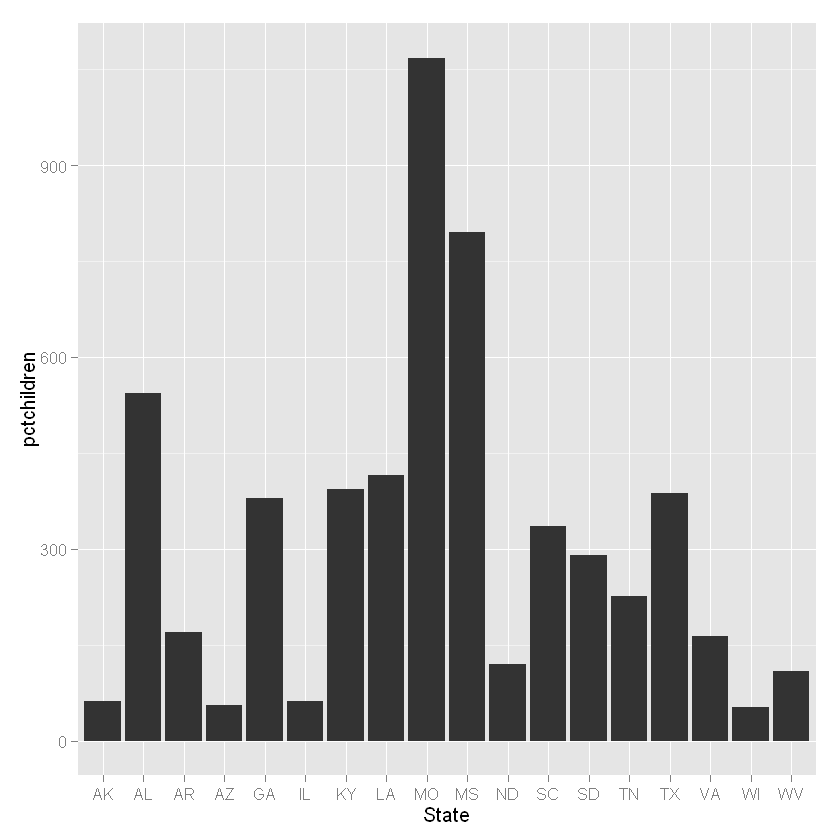

In [47]:
ggplot(data=pctChild50, aes(x=State, y=pctchildren)) + geom_bar(stat="identity")